# FAKE NEWS DETECTION USING MACHINE LEARNING

The dataset which is taken for study covers news pertaining to India only. It is created by scraping Indian fact checking websites. The dataset contains two types of news fake and real News. This dataset was collected from real-world sources.The truthful news and fake news were collected from different reliable fact-checking websites. The dataset contains different types of articles on different topics, however, the majority of news focus on political news.

The columns in the dataset is given below :

* id- Unique identifider for each news

* Statement- Title of the news article

* Image- Image Url

* Category-Topic of news

* Date- Date of news

* Label-  0 indicates fake news
       - 1 indicates real news

# Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk import word_tokenize
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, validation_curve, learning_curve, GridSearchCV
from numpy import mean, std
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_curve, confusion_matrix, classification_report, accuracy_score, roc_auc_score

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


# Loading the dataset to a pandas DataFrame

In [2]:
detect=pd.read_csv('Downloads/IFND.csv')

In [3]:
detect

,id,Statement,Image,Web,Category,Date,Label
0,1,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,1
1,2,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,1
2,3,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,1
3,4,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,1
4,5,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,1
...,...,...,...,...,...,...,...
56709,56710,Fact Check: This is not Bruce Lee playing ping...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,MISLEADING,Nov-19,0
56710,56711,Fact Check: Did Japan construct this bridge in...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,COVID-19,Oct-19,0
56711,56712,Fact Check: Viral video of Mexico earthquake i...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,MISLEADING,Oct-19,0
56712,56713,Fact Check: Ballet performance by Chinese coup...,https://akm-img-a-in.tosshub.com/indiatoday/im...,INDIATODAY,COVID-19,Sep-19,0


In [4]:
# Column Names
detect.columns

Index(['id', 'Statement', 'Image', 'Web', 'Category', 'Date', 'Label'], dtype='object')

In [5]:
#Shape of the Dataset
detect.shape

(56714, 7)

# Data Pre-processing

In [6]:
#Printing the first 5 rows of the Dataset
detect.head()

,id,Statement,Image,Web,Category,Date,Label
0,1,"WHO praises India's Aarogya Setu app, says it ...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,1
1,2,"In Delhi, Deputy US Secretary of State Stephen...",https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,VIOLENCE,Oct-20,1
2,3,LAC tensions: China's strategy behind delibera...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,TERROR,Oct-20,1
3,4,India has signed 250 documents on Space cooper...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,COVID-19,Oct-20,1
4,5,Tamil Nadu chief minister's mother passes away...,https://cdn.dnaindia.com/sites/default/files/s...,DNAINDIA,ELECTION,Oct-20,1


In [7]:
#Counting the number of missing values in the Dataset
detect.isnull().sum()

id               0
Statement        0
Image            0
Web              0
Category         0
Date         11321
Label            0
dtype: int64

In [8]:
#Replacing the null values with empty string
detect=detect.fillna('')

In [9]:
detect.isnull().sum()

id           0
Statement    0
Image        0
Web          0
Category     0
Date         0
Label        0
dtype: int64

In [10]:
#Finding is there any duplicates
detect[detect.duplicated()]

,id,Statement,Image,Web,Category,Date,Label


In [11]:
detect['Statement'][0]

"WHO praises India's Aarogya Setu app, says it helped in identifying COVID-19 clusters"

In [12]:
#Merging Statement and web on which it is published
detect['content']=detect['Web']+' '+detect['Statement']

In [13]:
print(detect['content'])

0        DNAINDIA WHO praises India's Aarogya Setu app,...
1        DNAINDIA In Delhi, Deputy US Secretary of Stat...
2        DNAINDIA LAC tensions: China's strategy behind...
3        DNAINDIA India has signed 250 documents on Spa...
4        DNAINDIA Tamil Nadu chief minister's mother pa...
                               ...                        
56709    INDIATODAY Fact Check: This is not Bruce Lee p...
56710    INDIATODAY Fact Check: Did Japan construct thi...
56711    INDIATODAY Fact Check: Viral video of Mexico e...
56712    INDIATODAY Fact Check: Ballet performance by C...
56713    INDIATODAY Fact Check: Is this little boy cros...
Name: content, Length: 56714, dtype: object


In [14]:
#Seperating the data and label
x=detect.drop(columns='Label',axis=1)
y=detect['Label']

In [15]:
print(x)


          id                                          Statement  \
0          1  WHO praises India's Aarogya Setu app, says it ...   
1          2  In Delhi, Deputy US Secretary of State Stephen...   
2          3  LAC tensions: China's strategy behind delibera...   
3          4  India has signed 250 documents on Space cooper...   
4          5  Tamil Nadu chief minister's mother passes away...   
...      ...                                                ...   
56709  56710  Fact Check: This is not Bruce Lee playing ping...   
56710  56711  Fact Check: Did Japan construct this bridge in...   
56711  56712  Fact Check: Viral video of Mexico earthquake i...   
56712  56713  Fact Check: Ballet performance by Chinese coup...   
56713  56714  Fact Check: Is this little boy crossing into J...   

                                                   Image         Web  \
0      https://cdn.dnaindia.com/sites/default/files/s...    DNAINDIA   
1      https://cdn.dnaindia.com/sites/default/files

In [16]:
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
56709    0
56710    0
56711    0
56712    0
56713    0
Name: Label, Length: 56714, dtype: int64


 Printing stopwords in English

In [17]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Natural Language Processing

The data in 'content' is converted using NLP techniques to be used in models

In [18]:
# Convert all text to lower case
detect['txt_low'] = detect['content'].str.lower()

In [19]:
# Remove special characters
detect['txt_cln'] = detect['txt_low'].str.replace('[^a-zA-Z.,!?/:;\"\'\s]','')

<ipython-input-19-835fa0b45e2e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  detect['txt_cln'] = detect['txt_low'].str.replace('[^a-zA-Z.,!?/:;\"\'\s]','')


In [20]:
detect['txt_cln']

0        dnaindia who praises india's aarogya setu app,...
1        dnaindia in delhi, deputy us secretary of stat...
2        dnaindia lac tensions: china's strategy behind...
3        dnaindia india has signed  documents on space ...
4        dnaindia tamil nadu chief minister's mother pa...
                               ...                        
56709    indiatoday fact check: this is not bruce lee p...
56710    indiatoday fact check: did japan construct thi...
56711    indiatoday fact check: viral video of mexico e...
56712    indiatoday fact check: ballet performance by c...
56713    indiatoday fact check: is this little boy cros...
Name: txt_cln, Length: 56714, dtype: object

In [21]:
#Remove Stopwords
stop = stopwords.words('english')

In [22]:
detect['txt_stop_rem'] = detect['txt_cln'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))

In [23]:
detect['txt_stop_rem'] 

0        dnaindia praises india's aarogya setu app, say...
1        dnaindia delhi, deputy us secretary state step...
2        dnaindia lac tensions: china's strategy behind...
3        dnaindia india signed documents space cooperat...
4        dnaindia tamil nadu chief minister's mother pa...
                               ...                        
56709    indiatoday fact check: bruce lee playing pingp...
56710    indiatoday fact check: japan construct bridge ...
56711    indiatoday fact check: viral video mexico eart...
56712    indiatoday fact check: ballet performance chin...
56713    indiatoday fact check: little boy crossing jor...
Name: txt_stop_rem, Length: 56714, dtype: object

# Stemming

Stemming is the process of reducing a word to its Root word

Example: 
    playing,plays,played ---> play

In [24]:
port_stem = PorterStemmer()

In [25]:
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [port_stem.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [26]:
detect['txt_stem'] = detect['txt_stop_rem'].apply(stem_sentences)

In [27]:
detect_fin = detect[['id', 'Label', 'txt_stem']]

In [28]:
detect_fin

,id,Label,txt_stem
0,1,1,"dnaindia prais india' aarogya setu app, say he..."
1,2,1,"dnaindia delhi, deputi us secretari state step..."
2,3,1,dnaindia lac tensions: china' strategi behind ...
3,4,1,dnaindia india sign document space cooper coun...
4,5,1,dnaindia tamil nadu chief minister' mother pas...
...,...,...,...
56709,56710,0,indiatoday fact check: bruce lee play pingpong...
56710,56711,0,indiatoday fact check: japan construct bridg h...
56711,56712,0,indiatoday fact check: viral video mexico eart...
56712,56713,0,indiatoday fact check: ballet perform chines c...


In [29]:
X=detect_fin['txt_stem'].values
Y=detect_fin['Label'].values

In [30]:
print(X)

["dnaindia prais india' aarogya setu app, say help identifi covid cluster"
 'dnaindia delhi, deputi us secretari state stephen biegun pitch pax indopacifica'
 "dnaindia lac tensions: china' strategi behind deliber fail talk india"
 ... 'indiatoday fact check: viral video mexico earthquak year old'
 'indiatoday fact check: ballet perform chines coupl goe viral wrong claim'
 'indiatoday fact check: littl boy cross jordan alon lose famili syria war?']


In [31]:
print(Y)

[1 1 1 ... 0 0 0]


In [32]:
Y.shape

(56714,)

# WordCloud

In [33]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


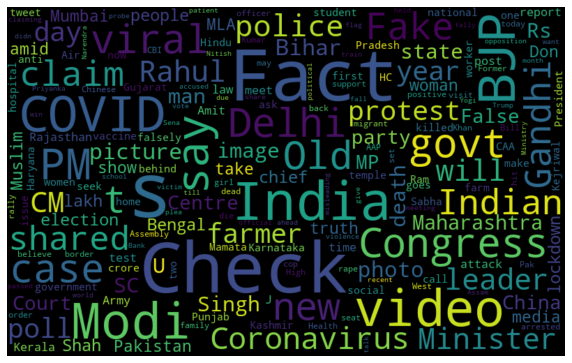

In [34]:
# Word cloud 
from wordcloud import WordCloud


all_words = ' '.join([text for text in detect.Statement])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Exploratory Data Analysis

How many articles per Category?

Category
COVID-19       8710
ELECTION       8396
GOVERNMENT    10923
MISLEADIND       18
MISLEADING     4059
POLITICS       8670
TERROR         4384
TRAD            976
VIOLENCE      10578
Name: Statement, dtype: int64


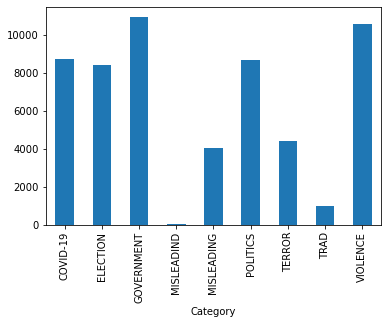

In [35]:
print(detect.groupby(['Category'])['Statement'].count())
detect.groupby(['Category'])['Statement'].count().plot(kind ="bar")
plt.show()

Number of real (1)  and Fake (0)  articles per Category

In [36]:
print(detect.groupby(['Category','Label'])['Label'].count())


Category    Label
COVID-19    0        2790
            1        5920
ELECTION    0         109
            1        8287
GOVERNMENT  0        3606
            1        7317
MISLEADIND  0          18
MISLEADING  0        4059
POLITICS    0        3222
            1        5448
TERROR      1        4384
TRAD        0         146
            1         830
VIOLENCE    0        4964
            1        5614
Name: Label, dtype: int64


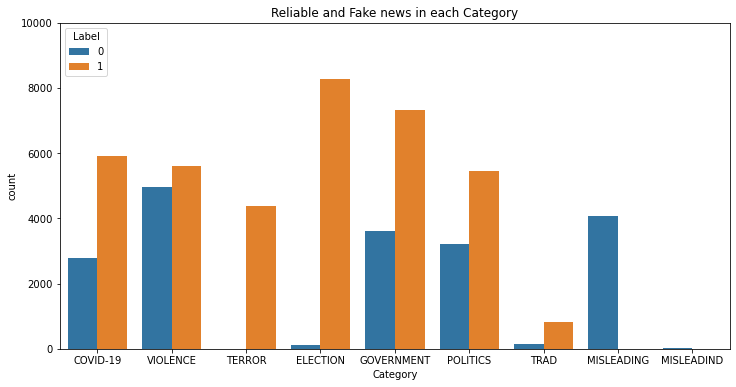

In [37]:
fig, ax=plt.subplots(figsize=(12,6))
sns.countplot(x='Category', data=detect, hue='Label')
ax.set_ylim(0,10000)
plt.title("Reliable and Fake news in each Category")
plt.show()

 Character Count in each news headlines

In [38]:
detect_fin['char_count'] = detect_fin['txt_stem'].apply(lambda x: len(str(x)))

<ipython-input-38-17ec3767d4af>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detect_fin['char_count'] = detect_fin['txt_stem'].apply(lambda x: len(str(x)))


In [39]:
detect_fin['char_count']

0        71
1        79
2        69
3        63
4        52
         ..
56709    55
56710    51
56711    60
56712    72
56713    73
Name: char_count, Length: 56714, dtype: int64

Word Count of news headlines

In [40]:
detect_fin['word_count'] = [len(x.split()) for x in detect_fin['txt_stem'].tolist()]

<ipython-input-40-3a4e50a3a3ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  detect_fin['word_count'] = [len(x.split()) for x in detect_fin['txt_stem'].tolist()]


Dataset with only reliable news

In [41]:
detect_rel = detect_fin.loc[(detect_fin.Label == 1)]

In [42]:

detect_rel

,id,Label,txt_stem,char_count,word_count
0,1,1,"dnaindia prais india' aarogya setu app, say he...",71,11
1,2,1,"dnaindia delhi, deputi us secretari state step...",79,11
2,3,1,dnaindia lac tensions: china' strategi behind ...,69,10
3,4,1,dnaindia india sign document space cooper coun...,63,9
4,5,1,dnaindia tamil nadu chief minister' mother pas...,52,8
...,...,...,...,...,...
37795,37796,1,newsmobil prez trump hospitalis next day docto...,51,7
37796,37797,1,newsmobil covid posit malaika arora assur fan ...,61,10
37797,37798,1,newsmobil covid first case coronaviru reinfect...,73,9
37798,37799,1,newsmobil unlock . guidelines: know allow what...,54,8


# WordCloud for reliable news

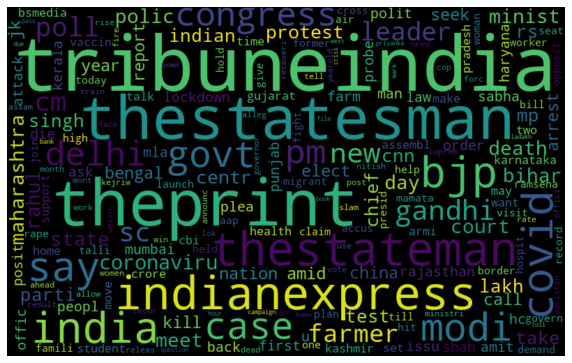

In [43]:

from wordcloud import WordCloud

real_data = detect_rel[detect_rel["Label"] == 1]
real_words = ' '.join([text for text in real_data.txt_stem])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(real_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Most Frequent Bigram (Two-word Combination)(Reliable News)

In [44]:
def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurences", n=2):
  """Utility function to plot top n-grams"""
  true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
  true_b.sort_values().plot.barh(color='magenta', width=.9, figsize=(12, 8))
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

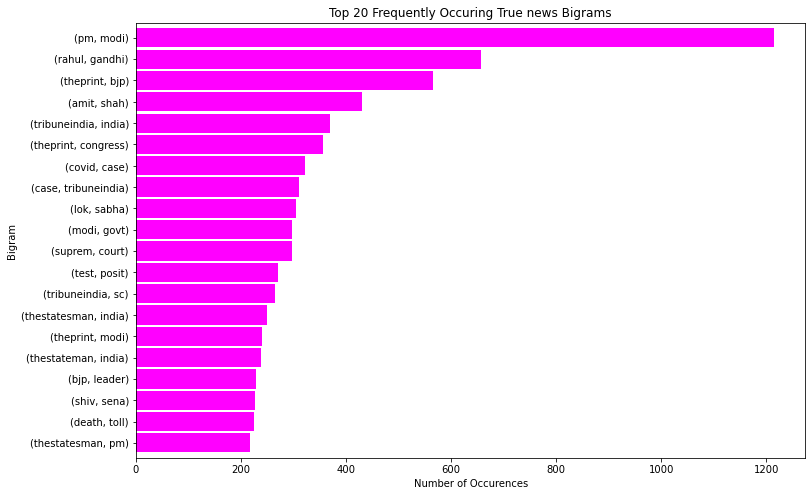

In [45]:
plot_top_ngrams(real_words, 'Top 20 Frequently Occuring True news Bigrams', "Bigram", n=2)

# Most Frequent Trigram (Three-word combination)(Reliable News)

In [46]:
def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurences", n=2):
  """Utility function to plot top n-grams"""
  true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
  true_b.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

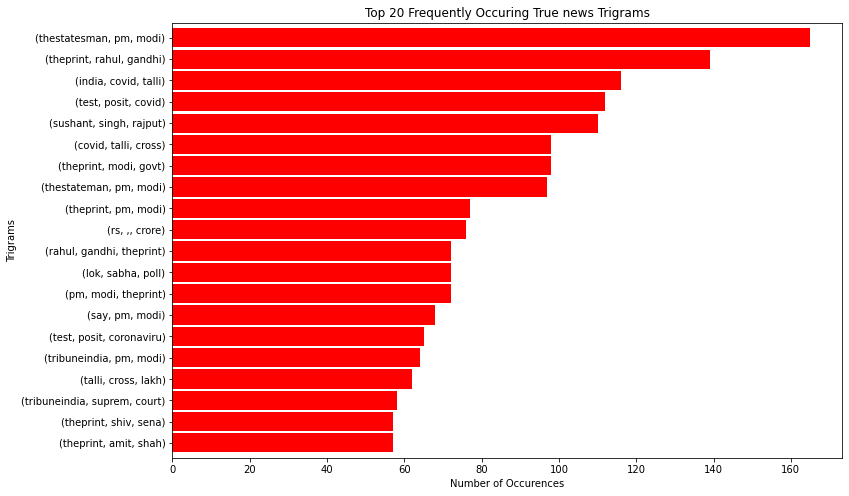

In [47]:
plot_top_ngrams(real_words, 'Top 20 Frequently Occuring True news Trigrams', "Trigrams", n=3)

Dataset with only Fake news

In [48]:
detect_fake = detect_fin.loc[(detect_fin.Label == 0)]

In [49]:
detect_fake

,id,Label,txt_stem,char_count,word_count
37800,37801,0,indiatoday fact check: video bk iyengar share ...,66,11
37801,37802,0,indiatoday fact check: conspiraci theori claim...,78,11
37802,37803,0,indiatoday fact check: gujarat rani ki vav sha...,79,13
37803,37804,0,"indiatoday fact check: no, pm modi announc ano...",63,10
37804,37805,0,indiatoday fact check: curiou case 'desecrated...,70,10
...,...,...,...,...,...
56709,56710,0,indiatoday fact check: bruce lee play pingpong...,55,8
56710,56711,0,indiatoday fact check: japan construct bridg h...,51,7
56711,56712,0,indiatoday fact check: viral video mexico eart...,60,9
56712,56713,0,indiatoday fact check: ballet perform chines c...,72,11


# WordCloud for fake news

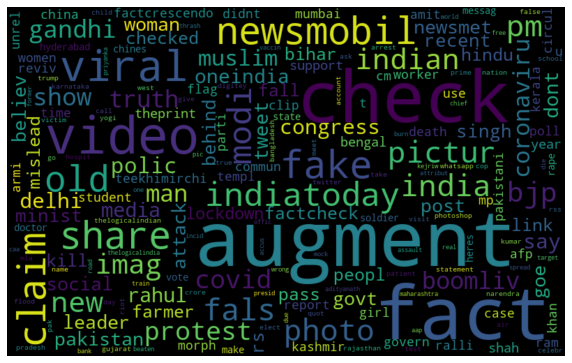

In [50]:
from wordcloud import WordCloud

fake_data =detect_fake[detect_fake["Label"] == 0]
fake_words = ' '.join([text for text in fake_data.txt_stem])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(fake_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Most Frequent Bigram (Two-word Combination)(Fake News)

In [51]:
def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurences", n=2):
  """Utility function to plot top n-grams"""
  true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
  true_b.sort_values().plot.barh(color='green', width=.9, figsize=(12, 8))
  plt.title(title)
  plt.ylabel(ylabel)
  plt.xlabel(xlabel)
  plt.show()

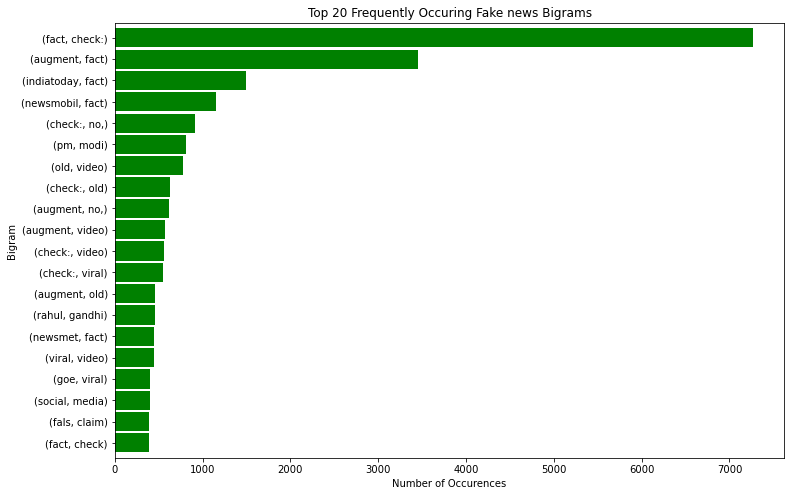

In [52]:
plot_top_ngrams(fake_words, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)


# Most Frequent Trigram (Three-word combination)(Fake News)

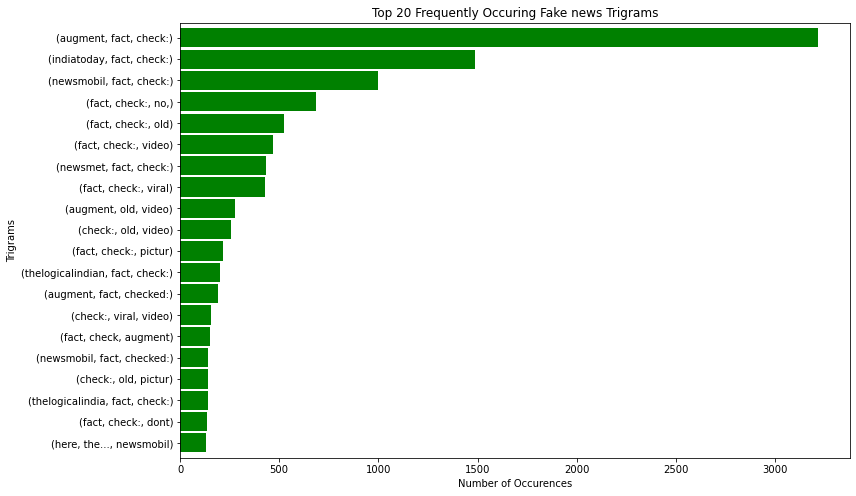

In [53]:
plot_top_ngrams(fake_words, 'Top 20 Frequently Occuring Fake news Trigrams', "Trigrams", n=3)

# Reliable vs Fake news count

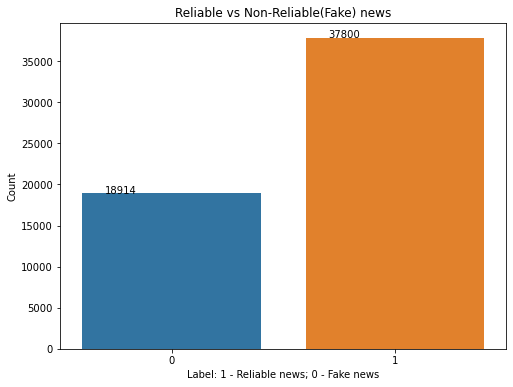

In [54]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Label", data=detect_fin)
plt.title('Reliable vs Non-Reliable(Fake) news')
plt.xlabel('Label: 1 - Reliable news; 0 - Fake news')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [55]:
print(detect_rel.shape,detect_fake.shape)

(37800, 5) (18914, 5)


# Balancing the imbalanced dataset

# Under Sampling

In [56]:
count_1,count_0=detect_fin.Label.value_counts()

In [57]:
detect_rel = detect_fin[detect_fin['Label'] == 1]
detect_fake = detect_fin[detect_fin['Label'] == 0]

In [58]:
count_1,count_0

(37800, 18914)

In [59]:
detect_under_1=detect_rel.sample(count_0) 
detect_test_under=pd.concat([detect_fake,detect_under_1], axis=0)
print('Random under_sampling:')
print(detect_test_under.Label.value_counts())

Random under_sampling:
0    18914
1    18914
Name: Label, dtype: int64


# Balanced Reliable vs Fake news count

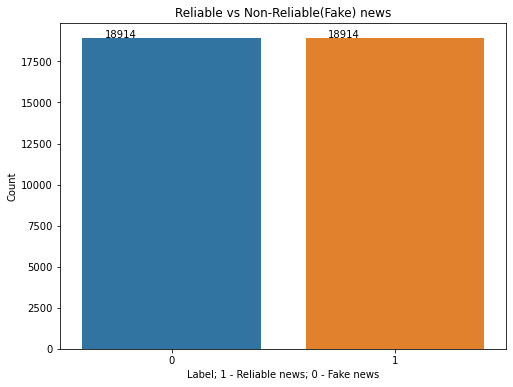

In [60]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Label", data=detect_test_under)
plt.title('Reliable vs Non-Reliable(Fake) news')
plt.xlabel('Label; 1 - Reliable news; 0 - Fake news')
plt.ylabel('Count')

for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [61]:
detect_rel_1 = detect_test_under.loc[(detect_test_under.Label == 1)]

In [62]:
detect_fake_0 = detect_test_under.loc[(detect_test_under.Label == 0)]

In [63]:
detect_fin

,id,Label,txt_stem,char_count,word_count
0,1,1,"dnaindia prais india' aarogya setu app, say he...",71,11
1,2,1,"dnaindia delhi, deputi us secretari state step...",79,11
2,3,1,dnaindia lac tensions: china' strategi behind ...,69,10
3,4,1,dnaindia india sign document space cooper coun...,63,9
4,5,1,dnaindia tamil nadu chief minister' mother pas...,52,8
...,...,...,...,...,...
56709,56710,0,indiatoday fact check: bruce lee play pingpong...,55,8
56710,56711,0,indiatoday fact check: japan construct bridg h...,51,7
56711,56712,0,indiatoday fact check: viral video mexico eart...,60,9
56712,56713,0,indiatoday fact check: ballet perform chines c...,72,11


In [64]:
detect_test_under

,id,Label,txt_stem,char_count,word_count
37800,37801,0,indiatoday fact check: video bk iyengar share ...,66,11
37801,37802,0,indiatoday fact check: conspiraci theori claim...,78,11
37802,37803,0,indiatoday fact check: gujarat rani ki vav sha...,79,13
37803,37804,0,"indiatoday fact check: no, pm modi announc ano...",63,10
37804,37805,0,indiatoday fact check: curiou case 'desecrated...,70,10
...,...,...,...,...,...
35817,35818,1,theprint consid step oppos caa kerala cm vijay...,73,12
8904,8905,1,tribuneindia heat debat farm bill rs; opposit ...,84,13
3448,3449,1,"indianexpress live fear hope case solv soon, s...",64,11
8603,8604,1,tribuneindia lancet caution india give much po...,60,9


# Character count of news headlines

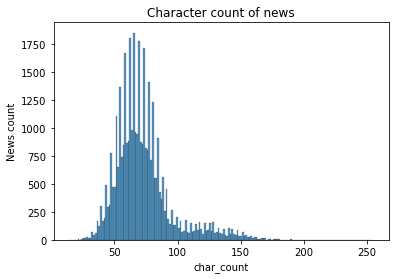

In [65]:
sns.histplot(detect_test_under['char_count'])
plt.ylabel('News count')
plt.title('Character count of news')
plt.show()

# Character count in Reliable news

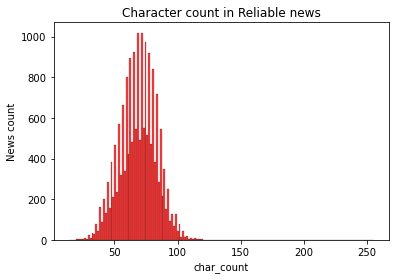

In [66]:
sns.histplot(detect_rel_1['char_count'],color='red')
plt.ylabel('News count')
plt.title('Character count in Reliable news')
plt.show()

# Character count in Fake news

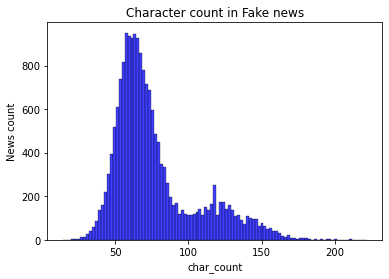

In [67]:
sns.histplot(detect_fake_0['char_count'],color='blue')
plt.ylabel('News count')
plt.title('Character count in Fake news')
plt.show()

Above plots shows fake news have more character count

# Word count of stemmed news headlines

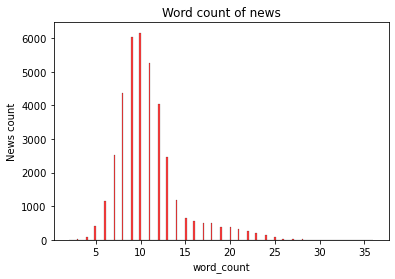

In [68]:
sns.histplot(detect_test_under['word_count'],color='red')
plt.ylabel('News count')
plt.title('Word count of news')
plt.show()

# Word count in Reliable news

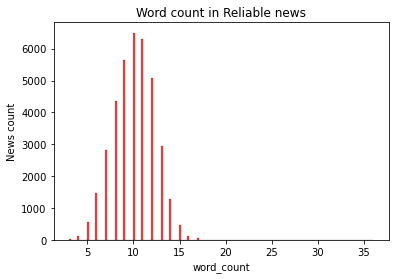

In [69]:
#word count of real news
sns.histplot(detect_rel['word_count'],color='red')
plt.ylabel('News count')
plt.title('Word count in Reliable news')
plt.show()


# Word count in Fake news

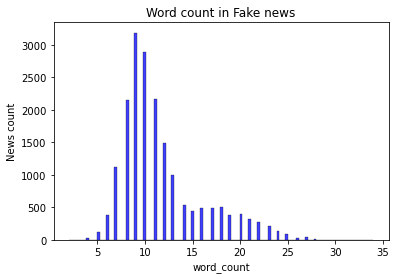

In [70]:
sns.histplot(detect_fake['word_count'],color='blue')
plt.ylabel('News count')
plt.title('Word count in Fake news')
plt.show()

# Outlier Detection

In [71]:
min(detect_test_under['char_count'])

14

In [72]:
max(detect_test_under['char_count'])

255

In [73]:
mean(detect_test_under['char_count'])

72.83491064819711

C:\Users\HemaMalya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='char_count'>

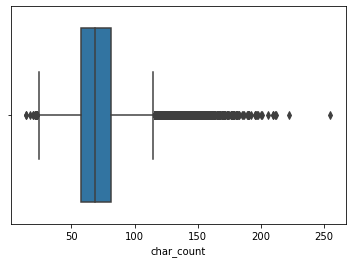

In [74]:
import seaborn as sns
sns.boxplot(detect_test_under['char_count'])

C:\Users\HemaMalya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='word_count'>

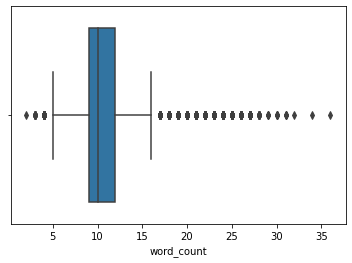

In [75]:
import seaborn as sns
sns.boxplot(detect_test_under['word_count'])

In [76]:
print(np.where(df_boston['DIS']>10))

NameError: name 'df_boston' is not defined

In [77]:
detect_test_under

,id,Label,txt_stem,char_count,word_count
37800,37801,0,indiatoday fact check: video bk iyengar share ...,66,11
37801,37802,0,indiatoday fact check: conspiraci theori claim...,78,11
37802,37803,0,indiatoday fact check: gujarat rani ki vav sha...,79,13
37803,37804,0,"indiatoday fact check: no, pm modi announc ano...",63,10
37804,37805,0,indiatoday fact check: curiou case 'desecrated...,70,10
...,...,...,...,...,...
35817,35818,1,theprint consid step oppos caa kerala cm vijay...,73,12
8904,8905,1,tribuneindia heat debat farm bill rs; opposit ...,84,13
3448,3449,1,"indianexpress live fear hope case solv soon, s...",64,11
8603,8604,1,tribuneindia lancet caution india give much po...,60,9


In [78]:
vec = CountVectorizer().fit(detect_rel_1['txt_stem'])
bgw = vec.transform(detect_rel_1['txt_stem'])
sum_word = bgw.sum(axis=0)
words_freq = [(word, sum_word[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq_rel = sorted(words_freq, key = lambda x: x[1], reverse=True)

In [79]:
# Frequent words in reliable news
words_freq_rel

[('tribuneindia', 5996),
 ('theprint', 4104),
 ('thestatesman', 3589),
 ('thestateman', 2044),
 ('indianexpress', 1963),
 ('india', 1745),
 ('covid', 1714),
 ('bjp', 1598),
 ('say', 1502),
 ('modi', 1330),
 ('govt', 1229),
 ('case', 1146),
 ('pm', 1042),
 ('delhi', 1038),
 ('congress', 1002),
 ('gandhi', 625),
 ('cm', 601),
 ('new', 592),
 ('sc', 582),
 ('leader', 542),
 ('minist', 515),
 ('rahul', 511),
 ('maharashtra', 508),
 ('day', 495),
 ('bihar', 495),
 ('court', 489),
 ('meet', 482),
 ('centr', 464),
 ('polic', 463),
 ('farmer', 461),
 ('poll', 460),
 ('death', 457),
 ('singh', 444),
 ('state', 442),
 ('lakh', 431),
 ('rs', 428),
 ('protest', 424),
 ('coronaviru', 423),
 ('chief', 421),
 ('parti', 420),
 ('indian', 419),
 ('test', 416),
 ('cnn', 393),
 ('take', 387),
 ('mp', 383),
 ('get', 382),
 ('china', 360),
 ('bengal', 354),
 ('arrest', 348),
 ('kill', 348),
 ('nation', 345),
 ('amid', 343),
 ('seek', 342),
 ('report', 336),
 ('jk', 329),
 ('call', 319),
 ('elect', 309),
 (

In [80]:
vec1 = CountVectorizer().fit(detect_fake_0['txt_stem'])
bgw1 = vec1.transform(detect_fake_0['txt_stem'])
sum_word1 = bgw1.sum(axis=0)
words_freq1 = [(word, sum_word1[0, idx]) for word, idx in vec1.vocabulary_.items()]
words_freq_fake = sorted(words_freq1, key = lambda x: x[1], reverse=True)

In [81]:
# Frequent words in fake news
words_freq_fake

[('augment', 11321),
 ('fact', 10186),
 ('check', 9596),
 ('video', 4398),
 ('viral', 2841),
 ('no', 2642),
 ('fake', 2277),
 ('claim', 2246),
 ('newsmobil', 2216),
 ('share', 2205),
 ('old', 1927),
 ('modi', 1707),
 ('indiatoday', 1606),
 ('fals', 1430),
 ('india', 1416),
 ('pm', 1394),
 ('pictur', 1349),
 ('photo', 1313),
 ('bjp', 1223),
 ('indian', 1220),
 ('imag', 1193),
 ('here', 1048),
 ('covid', 985),
 ('gandhi', 926),
 ('protest', 920),
 ('show', 888),
 ('news', 888),
 ('boomliv', 806),
 ('truth', 803),
 ('man', 791),
 ('muslim', 687),
 ('polic', 679),
 ('congress', 678),
 ('delhi', 677),
 ('say', 641),
 ('media', 613),
 ('rahul', 600),
 ('tweet', 558),
 ('oneindia', 549),
 ('dont', 548),
 ('coronaviru', 539),
 ('govt', 517),
 ('newsmet', 507),
 ('social', 500),
 ('woman', 498),
 ('pakistan', 497),
 ('attack', 493),
 ('believ', 485),
 ('goe', 485),
 ('leader', 478),
 ('post', 467),
 ('singh', 451),
 ('behind', 450),
 ('minist', 443),
 ('recent', 439),
 ('rs', 435),
 ('bihar', 4

In [82]:
detect1=detect[['id','Statement','Category','Label']]

In [83]:
detect1

,id,Statement,Category,Label
0,1,"WHO praises India's Aarogya Setu app, says it ...",COVID-19,1
1,2,"In Delhi, Deputy US Secretary of State Stephen...",VIOLENCE,1
2,3,LAC tensions: China's strategy behind delibera...,TERROR,1
3,4,India has signed 250 documents on Space cooper...,COVID-19,1
4,5,Tamil Nadu chief minister's mother passes away...,ELECTION,1
...,...,...,...,...
56709,56710,Fact Check: This is not Bruce Lee playing ping...,MISLEADING,0
56710,56711,Fact Check: Did Japan construct this bridge in...,COVID-19,0
56711,56712,Fact Check: Viral video of Mexico earthquake i...,MISLEADING,0
56712,56713,Fact Check: Ballet performance by Chinese coup...,COVID-19,0


In [84]:
detect_real_1 = detect1.loc[(detect1.Label == 1)]

In [85]:
detect_real_1

,id,Statement,Category,Label
0,1,"WHO praises India's Aarogya Setu app, says it ...",COVID-19,1
1,2,"In Delhi, Deputy US Secretary of State Stephen...",VIOLENCE,1
2,3,LAC tensions: China's strategy behind delibera...,TERROR,1
3,4,India has signed 250 documents on Space cooper...,COVID-19,1
4,5,Tamil Nadu chief minister's mother passes away...,ELECTION,1
...,...,...,...,...
37795,37796,Prez Trump to be hospitalised for next �few da...,TRAD,1
37796,37797,COVID-19 positive Malaika Arora assures fans s...,TRAD,1
37797,37798,COVID-19 | First case of coronavirus reinfecti...,VIOLENCE,1
37798,37799,Unlock 4.0 guidelines: Know what is allowed an...,ELECTION,1


<AxesSubplot:xlabel='Category', ylabel='count'>

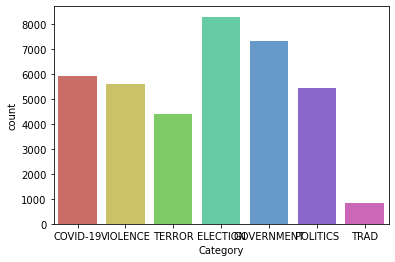

In [86]:
def create_distribution(dataFile):
    return sns.countplot(x='Category', data=dataFile,palette='hls')
create_distribution(detect_real_1)

In [87]:
detect_fake_0 = detect1.loc[(detect1.Label == 0)]

In [88]:
detect_fake_0

,id,Statement,Category,Label
37800,37801,Fact Check: 1938 video of BKS Iyengar shared ...,COVID-19,0
37801,37802,Fact Check: Conspiracy theory claims Sushant ...,MISLEADING,0
37802,37803,Fact Check: Gujarat�s Rani ki Vav shared as p...,GOVERNMENT,0
37803,37804,"Fact Check: No, PM Modi has not announced ano...",COVID-19,0
37804,37805,Fact Check: The curious case of a 'desecrated...,POLITICS,0
...,...,...,...,...
56709,56710,Fact Check: This is not Bruce Lee playing ping...,MISLEADING,0
56710,56711,Fact Check: Did Japan construct this bridge in...,COVID-19,0
56711,56712,Fact Check: Viral video of Mexico earthquake i...,MISLEADING,0
56712,56713,Fact Check: Ballet performance by Chinese coup...,COVID-19,0


<AxesSubplot:xlabel='Category', ylabel='count'>

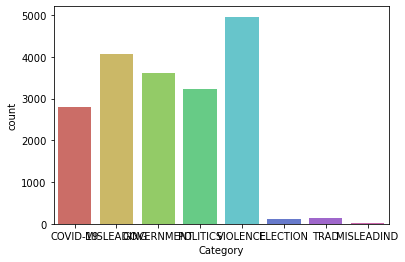

In [89]:
def create_distribution(dataFile):
    return sns.countplot(x='Category', data=dataFile,palette='hls')
create_distribution(detect_fake_0)

In [90]:
#converting the textual data to numerical data

In [91]:
detect_test_under

,id,Label,txt_stem,char_count,word_count
37800,37801,0,indiatoday fact check: video bk iyengar share ...,66,11
37801,37802,0,indiatoday fact check: conspiraci theori claim...,78,11
37802,37803,0,indiatoday fact check: gujarat rani ki vav sha...,79,13
37803,37804,0,"indiatoday fact check: no, pm modi announc ano...",63,10
37804,37805,0,indiatoday fact check: curiou case 'desecrated...,70,10
...,...,...,...,...,...
35817,35818,1,theprint consid step oppos caa kerala cm vijay...,73,12
8904,8905,1,tribuneindia heat debat farm bill rs; opposit ...,84,13
3448,3449,1,"indianexpress live fear hope case solv soon, s...",64,11
8603,8604,1,tribuneindia lancet caution india give much po...,60,9


In [92]:
X1=detect_test_under['txt_stem'].values
Y1=detect_test_under['Label'].values
vectorizer = TfidfVectorizer()
vectorizer.fit(X1)
X1=vectorizer.transform(X1)
print(X1)

  (0, 19336)	0.4064693204251838
  (0, 18645)	0.1695443483332872
  (0, 15676)	0.201054755101504
  (0, 13072)	0.19759086035738035
  (0, 12820)	0.3526592206757289
  (0, 11033)	0.1864190213054639
  (0, 8694)	0.49284697968024843
  (0, 8287)	0.21522137636631042
  (0, 5994)	0.13168898470806406
  (0, 3023)	0.13413852960726522
  (0, 2077)	0.49284697968024843
  (1, 17433)	0.4040205067098905
  (1, 17376)	0.2644298963771493
  (1, 16978)	0.3142502010011403
  (1, 12674)	0.48367416394472135
  (1, 9383)	0.257319472250244
  (1, 8287)	0.2112156989265592
  (1, 5994)	0.12923800328598162
  (1, 3785)	0.33663092847940307
  (1, 3664)	0.37135020420181597
  (1, 3229)	0.19511937230673068
  (1, 3023)	0.13164195751521288
  (2, 19109)	0.2413404158576032
  (2, 18540)	0.38177647971622913
  (2, 15676)	0.14837344047667558
  :	:
  (37825, 15901)	0.32448243272971294
  (37825, 15237)	0.16700794272721486
  (37825, 9957)	0.2820415021606553
  (37825, 9392)	0.32141203448851297
  (37825, 8278)	0.1700685327205616
  (37825, 7795

In [93]:
###


In [94]:
# TFIDF is used to convert text_stem variable to numbers
tfidf = TfidfVectorizer(max_features=1000)

In [95]:
tfidf

TfidfVectorizer(max_features=1000)

In [96]:
tfidf.vocabulary_

AttributeError: 'TfidfVectorizer' object has no attribute 'vocabulary_'

In [97]:
#X = detect_fin['txt_stem'].tolist()
X = tfidf.fit_transform(detect_test_under['txt_stem']).toarray()
y = detect_test_under['Label'].values

In [98]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [99]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Modeling

In [100]:
# Function to plot confusion matrix

In [101]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [102]:
# Split the data
X_train,X_test,y_train,y_test=train_test_split(detect_test_under['txt_stem'],detect_test_under.Label,test_size=0.2,random_state=42)

In [103]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# Naive Bayes

In [104]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model1 = pipe.fit(X_train, y_train)
prediction1 = model1.predict(X_test)
print("accuracy:{}%".format(round(accuracy_score(y_test, prediction1)*100,2)))


dct['Naive Bayes'] = round(accuracy_score(y_test, prediction1)*100,2)
print(classification_report(y_test,prediction1))

accuracy:96.39%
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      3768
           1       0.96      0.97      0.96      3798

    accuracy                           0.96      7566
   macro avg       0.96      0.96      0.96      7566
weighted avg       0.96      0.96      0.96      7566



Confusion matrix, without normalization


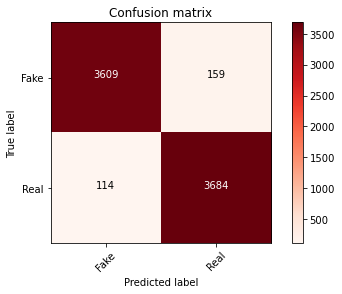

In [105]:
cm = metrics.confusion_matrix(y_test, prediction1)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Logistic regression

In [106]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression


pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model2= pipe.fit(X_train, y_train)

# Accuracy
prediction2= model2.predict(X_test)

print("accuracy:{}%".format(round(accuracy_score(y_test, prediction2)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction2)*100,2)
print(classification_report(y_test,prediction2))

accuracy:98.92%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3768
           1       0.99      0.99      0.99      3798

    accuracy                           0.99      7566
   macro avg       0.99      0.99      0.99      7566
weighted avg       0.99      0.99      0.99      7566



Confusion matrix, without normalization


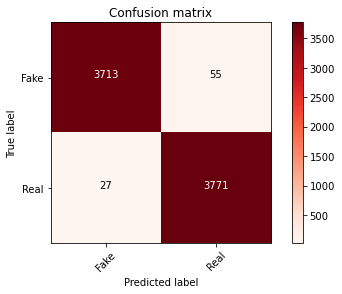

In [107]:
cm = metrics.confusion_matrix(y_test, prediction2)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Decision Tree

In [111]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model3= pipe.fit(X_train, y_train)

# Accuracy
prediction3 = model3.predict(X_test)

print("accuracy:{}%".format(round(accuracy_score(y_test, prediction3)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction3)*100,2)
print(classification_report(y_test,prediction3))

accuracy:98.86%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3768
           1       0.99      0.99      0.99      3798

    accuracy                           0.99      7566
   macro avg       0.99      0.99      0.99      7566
weighted avg       0.99      0.99      0.99      7566



Confusion matrix, without normalization


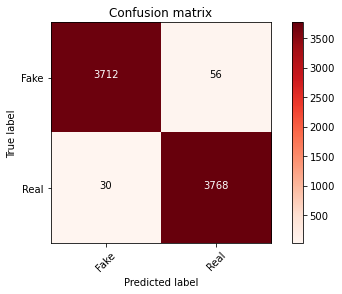

In [112]:
cm = metrics.confusion_matrix(y_test, prediction3)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Random Forest

In [113]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model4 = pipe.fit(X_train, y_train)
prediction4 = model4.predict(X_test)

print("accuracy:{}%".format(round(accuracy_score(y_test, prediction4)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction4)*100,2)
print(classification_report(y_test,prediction4))

accuracy:98.97%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3768
           1       0.99      0.99      0.99      3798

    accuracy                           0.99      7566
   macro avg       0.99      0.99      0.99      7566
weighted avg       0.99      0.99      0.99      7566



In [114]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 98.85%


Confusion matrix, without normalization


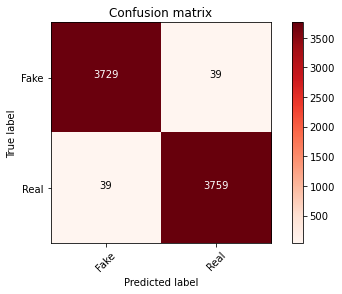

In [115]:
cm = metrics.confusion_matrix(y_test, prediction4)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# SVM

In [101]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model5 = pipe.fit(X_train, y_train)
prediction5= model5.predict(X_test)

print("accuracy:{}%".format(round(accuracy_score(y_test, prediction5)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction5)*100,2)
print(classification_report(y_test,prediction5))

accuracy:98.94%
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3768
           1       0.99      0.99      0.99      3798

    accuracy                           0.99      7566
   macro avg       0.99      0.99      0.99      7566
weighted avg       0.99      0.99      0.99      7566



Confusion matrix, without normalization


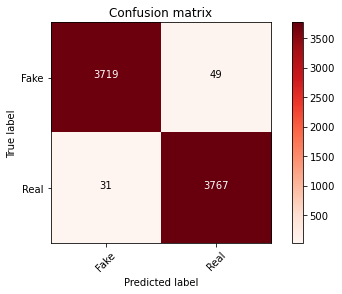

In [102]:
cm = metrics.confusion_matrix(y_test, prediction5)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# KNN Classifier

In [103]:
KNN_classifier =  KNeighborsClassifier()

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNN_classifier)])

model6 = pipe.fit(X_train, y_train)
prediction6 = model6.predict(X_test)
print("accuracy:{}%".format(round(accuracy_score(y_test, prediction6)*100,2)))


dct['KNN'] = round(accuracy_score(y_test, prediction6)*100,2)
print(classification_report(y_test,prediction6))

accuracy:87.91%
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      3768
           1       0.93      0.82      0.87      3798

    accuracy                           0.88      7566
   macro avg       0.88      0.88      0.88      7566
weighted avg       0.88      0.88      0.88      7566



Confusion matrix, without normalization


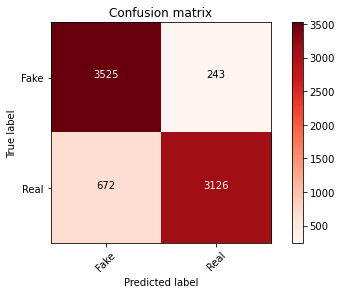

In [104]:
cm = metrics.confusion_matrix(y_test, prediction6)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# Accuracy

([<matplotlib.axis.YTick at 0x2875f592100>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

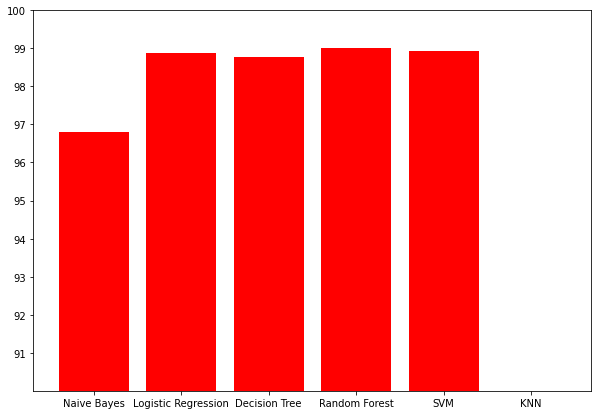

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.bar(list(dct.keys()),list(dct.values()),color='red')
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

# Hyper parameter tuning


In [116]:
tfvect = TfidfVectorizer(max_features=1000)
tfid_x_train = tfvect.fit_transform(X_train)
tfid_x_test = tfvect.transform(X_test)

In [117]:
classifier = RandomForestClassifier()
classifier1= DecisionTreeClassifier()
classifier.fit(tfid_x_train,y_train)
classifier1.fit(tfid_x_train,y_train)

DecisionTreeClassifier()

In [118]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    if (prediction[0] == 0):
        print('The news in Fake')
    else:
        print('The news is Real')
            

In [119]:
fake_news_det("WHO praises India's Aarogya Setu app, says it helped in identifying COVID-19 clusters")

The news is Real


In [120]:
fake_news_det("UP: Fourth accused held in Hathras gangrape case")

The news is Real


In [121]:
fake_news_det(" Viral: Fake claim on 120 crore cash seized from BJP worker in Karnataka ")

The news in Fake


In [122]:
fake_news_det("Troll Twitter Account Revives 2014 Sholay-Al Jazeera Fake Screenshot")

The news in Fake


In [123]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier1.predict(vectorized_input_data)
    if (prediction[0] == 0):
        print('The news in Fake')
    else:
        print('The news is Real')
            

In [124]:
fake_news_det(" Viral: Fake claim on 120 crore cash seized from BJP worker in Karnataka ")

The news in Fake
